In [61]:
import numpy as np
import openml
import sys
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(threshold=sys.maxsize)
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import ucimlrepo

In [107]:
def visualize(features):
    rows = int(np.ceil(len(vis_features)/3))
    fig, axs = plt.subplots(rows, 3)

    for i, f in enumerate(features):
        plt.subplots_adjust(wspace=0.4, hspace=0.6)

        x = X[f]
        # Check if it's a string or a number
        if isinstance(x[0], str):
            n = 10
            truncate = lambda f: f[:n]
            vfunc = np.vectorize(truncate)
            # x = vfunc(x)
            pass
            # Initialize label encoder
            # label_encoder = LabelEncoder()
            # Fit and transform the string array
            # x = label_encoder.fit_transform(x)
        else:
            x = x[~np.isnan(x)]
            # x = (x - x.mean())/x.std()

            # filter outliers
            Q1 = np.percentile(x, 10)-0.01
            Q3 = np.percentile(x, 90)+0.01
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            x = x[(x > lower_bound) & (x < upper_bound)]

        m = i // 3
        n = i % 3

        axs[m,n].tick_params(axis='x', rotation=30)
        labels = axs[m,n].get_xticklabels()  # Get the x-tick labels
        for label in labels:
            label.set_ha('right')
        n_bins = 20
        if len(np.unique(x)) < 20:
            n_bins = len(np.unique(x))
        axs[m,n].hist(x, bins=n_bins, color='skyblue', edgecolor='black')
        if len(np.unique(x)) < 20:
            axs[m,n].set_xticks(np.unique(x))
        axs[m,n].set_xlabel(f)
        axs[m,n].set_ylabel('Frequency')

    plt.show()

In [108]:
# Get dataset by name
dataset = openml.datasets.get_dataset('eucalyptus', download_data=True, download_qualities=True, download_features_meta_data=True)

# Get the data itself as a dataframe (or otherwise)
X, y, _, _ = dataset.get_data(dataset_format="dataframe")

In [109]:
X

,Abbrev,Rep,Locality,Map_Ref,Latitude,Altitude,Rainfall,Frosts,Year,Sp,PMCno,DBH,Ht,Surv,Vig,Ins_res,Stem_Fm,Crown_Fm,Brnch_Fm,Utility
0,Cra,1,Central_Hawkes_Bay,N135_382/137,39__38,100.0,850.0,-2.0,1980.0,co,1520.0,18.45,9.96,40.0,4.0,3.0,3.5,4.0,3.5,good
1,Cra,1,Central_Hawkes_Bay,N135_382/137,39__38,100.0,850.0,-2.0,1980.0,fr,1487.0,13.15,9.65,90.0,4.5,4.0,3.5,3.5,3.0,best
2,Cra,1,Central_Hawkes_Bay,N135_382/137,39__38,100.0,850.0,-2.0,1980.0,ma,1362.0,10.32,6.50,50.0,2.3,2.5,3.0,3.5,3.0,low
3,Cra,1,Central_Hawkes_Bay,N135_382/137,39__38,100.0,850.0,-2.0,1980.0,nd,1596.0,14.80,9.48,70.0,3.7,3.0,3.3,4.0,3.5,good
4,Cra,1,Central_Hawkes_Bay,N135_382/137,39__38,100.0,850.0,-2.0,1980.0,ni,2088.0,14.50,10.78,90.0,4.0,2.7,3.3,3.0,3.0,good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,WSh,1,Southern_Hawkes_Bay,N151_922/226,40__36,100.0,1250.0,-2.0,1983.0,fa,2548.0,41.63,12.64,28.0,4.2,3.2,2.3,1.9,1.7,average
732,WSh,1,Southern_Hawkes_Bay,N151_922/226,40__36,100.0,1250.0,-2.0,1983.0,fr,2552.0,33.35,10.61,33.0,4.5,4.0,2.8,3.0,1.5,good
733,WSh,1,Southern_Hawkes_Bay,N151_922/226,40__36,100.0,1250.0,-2.0,1983.0,ni,2568.0,28.21,9.47,94.0,4.6,3.0,2.0,1.8,1.2,good
734,WSh,1,Southern_Hawkes_Bay,N151_922/226,40__36,100.0,1250.0,-2.0,1983.0,ob,1522.0,27.36,11.49,67.0,4.7,3.3,3.4,3.4,3.0,good


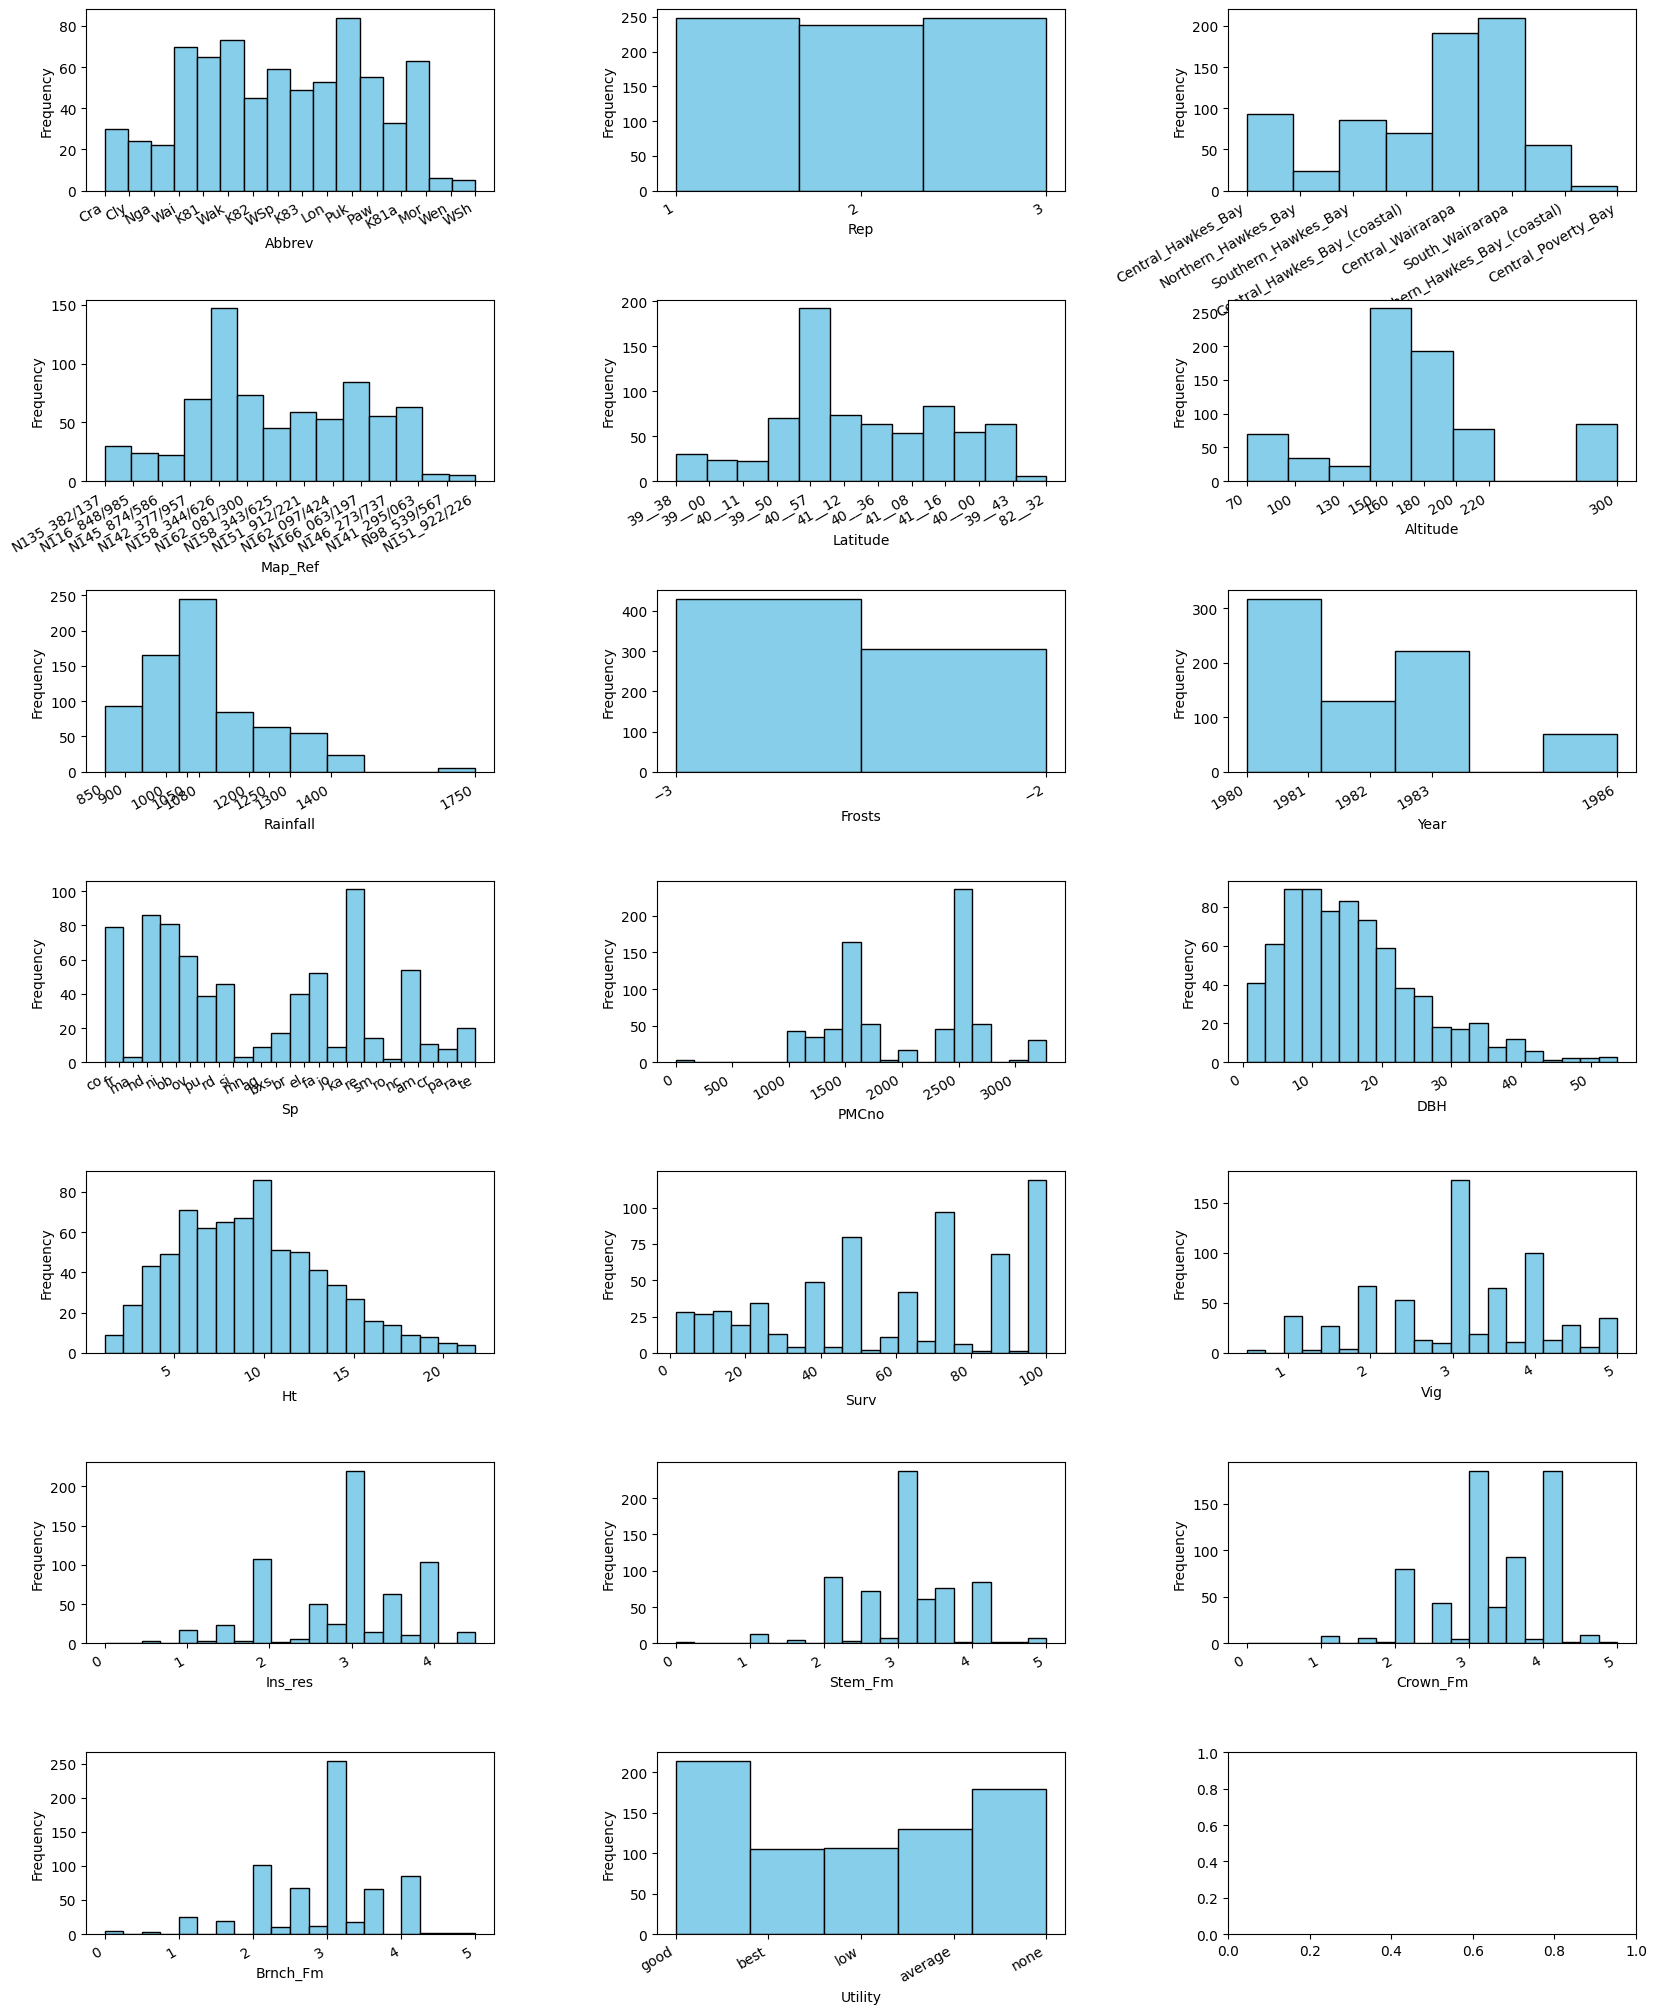

In [112]:
vis_features = X.columns.tolist() # ['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight', 'SMOKE', 'CALC', 'MTRANS', 'obesity']
plt.rcParams['figure.figsize'] = [20, 25]
visualize(vis_features)

In [89]:
# Get dataset by name
dataset = ucimlrepo.fetch_ucirepo(id=544)

# Get the data itself as a dataframe (or otherwise)
X = dataset.data.features
y = dataset.data.targets

X['obesity'] = y['NObeyesdad']

In [41]:
X

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,obesity
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


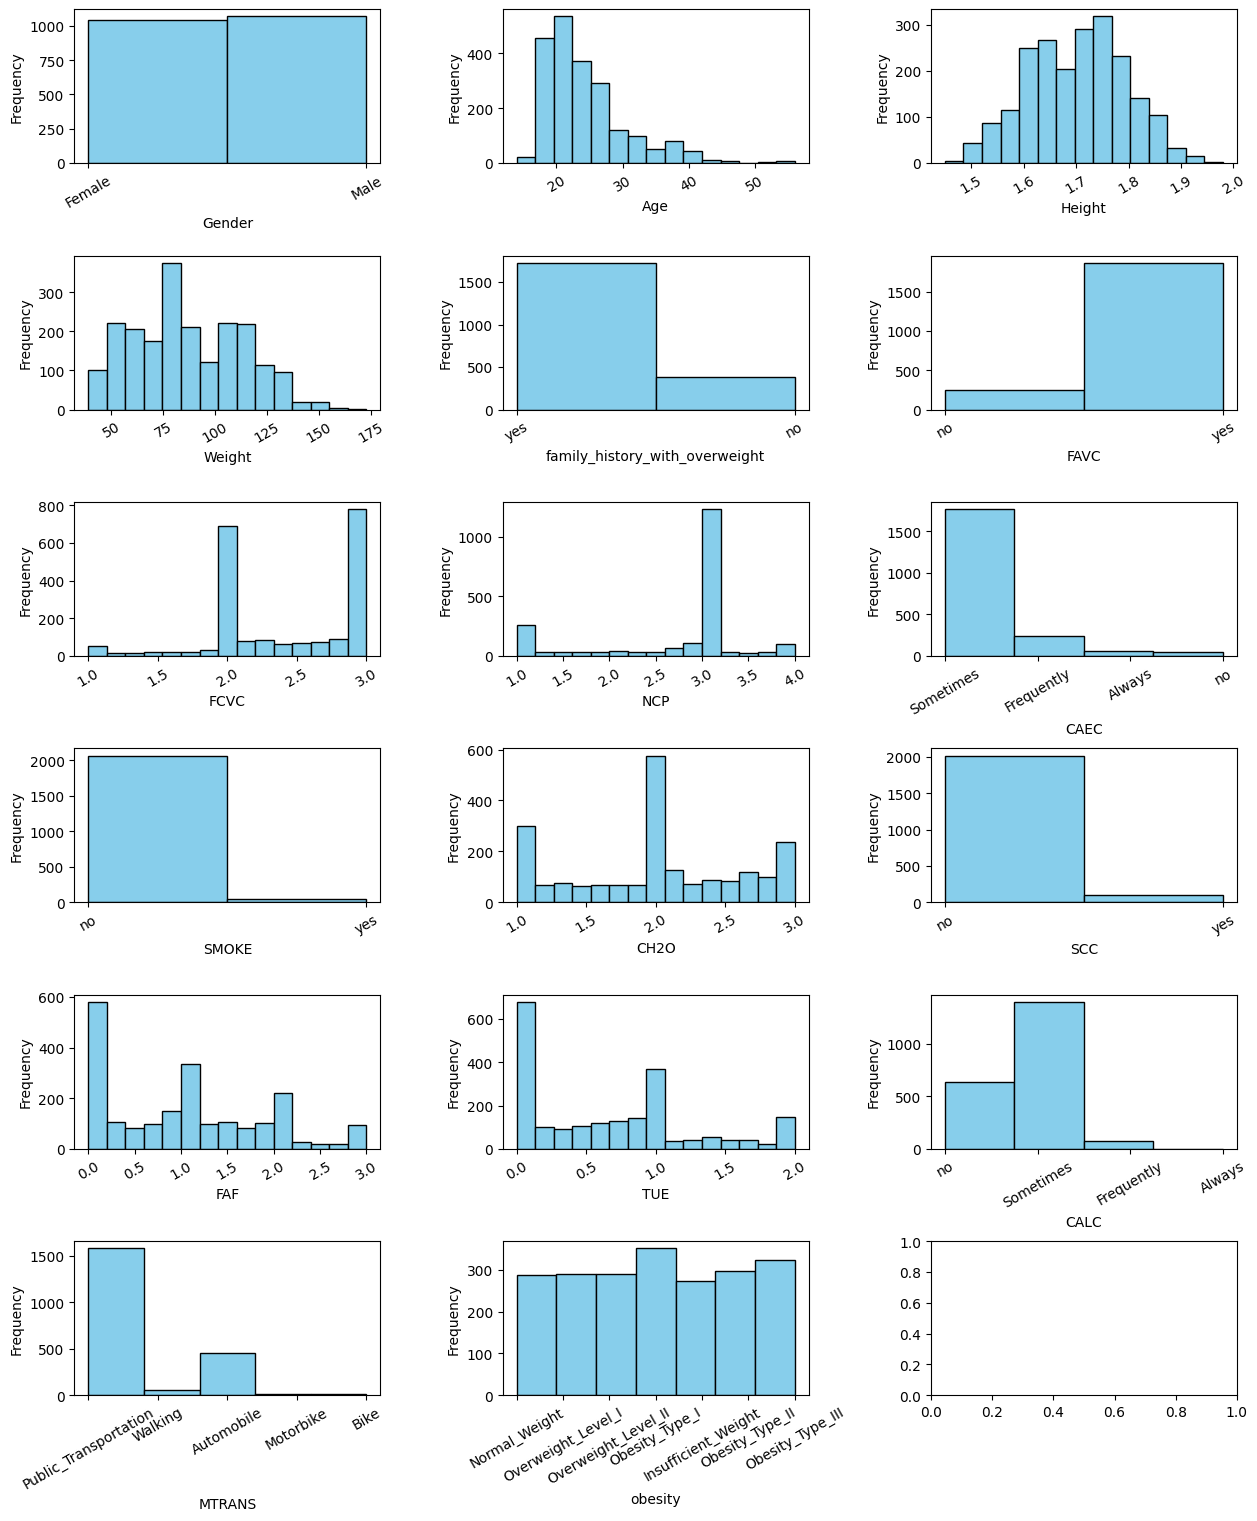

In [56]:
vis_features = X.columns.tolist() # ['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight', 'SMOKE', 'CALC', 'MTRANS', 'obesity']
plt.rcParams['figure.figsize'] = [15, 18]
visualize(vis_features)